#### Análise exploratória dos dados

1. Bibliotecas utilizadas

In [3]:
import pandas as pd # pandas
import matplotlib.pyplot as plt # matplotlib
from wordcloud import WordCloud # wordcloud

2. Leitura do dataset utilizado

In [222]:
df_sentimentos = pd.read_csv("./data/data.csv",sep=",",encoding="utf-8")
df_sentimentos.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


3. extraindo algumas infos

In [223]:
# Visualizando os dados de forma aleatória
display(df_sentimentos.sample(5))

,Sentence,Sentiment
4636,"Tectia Corporation HEL : TEC1V , a provider of...",positive
3556,LSC 's 30 employees will move to Ixonos with t...,neutral
68,More staff has been recruited in Japan to furt...,positive
5821,Finnish electronics contract manufacturer Scan...,negative
1732,The respondents praised Finnair 's reliability...,positive


In [224]:
# Visualizando informações gerais sobre o dataset
df_sentimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6049 entries, 0 to 6048
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   6049 non-null   object
 1   Sentiment  6049 non-null   object
dtypes: object(2)
memory usage: 94.6+ KB


In [225]:
# Visualizando a distribuição dos dados
colunas = list(df_sentimentos.columns)
for coluna in colunas:
	print(f"Distribuição da coluna {coluna}")
	print(df_sentimentos[coluna].value_counts())
	print("\n")

Distribuição da coluna Sentence
Sentence
I'm so annoyed right now.                                                                                                                                                                                                                                                                                  9
I'm so discouraged right now.                                                                                                                                                                                                                                                                              9
I'm really upset about this situation.                                                                                                                                                                                                                                                                     7
This is the worst possible outcome.                     

In [226]:
# Tamanho do dataset
print("Tamanho do dataset")
print("Quantidade de linhas: ", df_sentimentos.shape[0])
print("Quantidade de colunas: ", df_sentimentos.shape[1])

Tamanho do dataset
Quantidade de linhas:  6049
Quantidade de colunas:  2


In [227]:
# Visualizando a quantidade de dados faltantes
print("Dados faltantes: ")
print(df_sentimentos.isnull().sum())

Dados faltantes: 
Sentence     0
Sentiment    0
dtype: int64


In [228]:
# Ver estatísticas descritivas do datasetp
print(df_sentimentos.describe())

                         Sentence Sentiment
count                        6049      6049
unique                       5421         3
top     I'm so annoyed right now.   neutral
freq                            9      3130


In [229]:
df_sentimentos['sentence_length'] = df_sentimentos['Sentence'].apply(lambda x: len(x.split()))
df_sentimentos['sentence_length'].describe()

count    6049.000000
mean       20.563234
std        10.451387
min         2.000000
25%        12.000000
50%        19.000000
75%        27.000000
max        81.000000
Name: sentence_length, dtype: float64

In [230]:
#valores duplicados
print("Valores duplicados: ")
df_sentimentos_duplicados = df_sentimentos[df_sentimentos.duplicated()]
display(df_sentimentos_duplicados)
# Dropando valores duplicados
print("Dropando valores duplicados: ")
df_sentimentos_clean = df_sentimentos.drop_duplicates()
display(df_sentimentos_clean)

Valores duplicados: 


,Sentence,Sentiment,sentence_length
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral,48
1859,SSH Communications Security Corporation is hea...,neutral,11
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral,11
3272,The company serves customers in various indust...,neutral,45
3986,The issuer is solely responsible for the conte...,neutral,12
...,...,...,...
6044,This is the worst possible outcome.,negative,6
6045,I'm so frustrated with the lack of communication.,negative,8
6046,I'm really upset about this situation.,negative,6
6047,I can't believe how poorly this was handled.,negative,8


Dropando valores duplicados: 


,Sentence,Sentiment,sentence_length
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23
...,...,...,...
6010,I'm not happy with the service at all.,negative,8
6013,This is the worst customer experience ever.,negative,7
6014,I'm so dissatisfied with the quality of the pr...,negative,9
6015,I'm really frustrated with these constant issues.,negative,7


In [231]:
# pegando os dados duplicados e vendo que algumas sentencas estão com sentimentos diferentes
df_sentimentos_duplicados = df_sentimentos_clean[df_sentimentos_clean.duplicated(subset=['Sentence'], keep=False)]
df_sentimentos_duplicados_ordenados = df_sentimentos_duplicados.sort_values(by='Sentence')
display(df_sentimentos_duplicados_ordenados)
print("Quantidade de sentimentos: ", df_sentimentos_duplicados_ordenados['Sentiment'].value_counts())

,Sentence,Sentiment,sentence_length
3685,"( ADP News ) - Feb 11 , 2009 - Finnish wood pr...",negative,46
4578,"( ADP News ) - Feb 11 , 2009 - Finnish wood pr...",neutral,46
1488,"( ADP News ) - Feb 12 , 2009 - Finnish constru...",negative,44
3765,"( ADP News ) - Feb 12 , 2009 - Finnish constru...",neutral,44
1051,"( ADP News ) - Feb 4 , 2009 - Finnish broadban...",negative,48
...,...,...,...
5612,down to EUR5 .9 m H1 '09 3 August 2009 - Finni...,neutral,43
904,in Finland Finnish pharmaceutical company Orio...,neutral,35
3368,in Finland Finnish pharmaceutical company Orio...,negative,35
3075,stores 16 March 2010 - Finnish stationery and ...,negative,44


Quantidade de sentimentos:  Sentiment
negative    514
neutral     514
Name: count, dtype: int64


In [232]:
#deixando somente os dados unicos
df_sentimentos_unicos = df_sentimentos_clean.drop_duplicates(subset=['Sentence'], keep=False)
df_sentimentos_unicos

,Sentence,Sentiment,sentence_length
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23
...,...,...,...
6010,I'm not happy with the service at all.,negative,8
6013,This is the worst customer experience ever.,negative,7
6014,I'm so dissatisfied with the quality of the pr...,negative,9
6015,I'm really frustrated with these constant issues.,negative,7


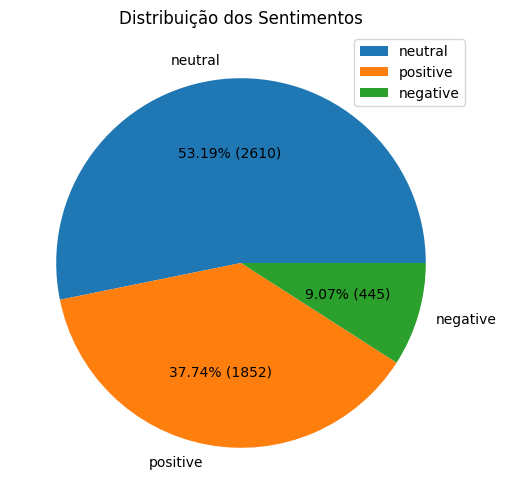

In [233]:
sentimentos_counts = df_sentimentos_unicos['Sentiment'].value_counts()
# Criar um gráfico de pizza
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(sentimentos_counts, labels = sentimentos_counts.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*sentimentos_counts.sum()))
plt.title('Distribuição dos Sentimentos')
plt.legend(patches, sentimentos_counts.index, loc="best")
plt.show()

In [235]:
print("Exemplo: ",df_sentimentos_unicos['Sentence'].iloc[1])

Exemplo:  $ESI on lows, down $1.50 to $2.50 BK a real possibility


#### Tratamento dos dados

1. Importação das bibliotecas utilizadas no processo de tratamento dos dados

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

2. Downloads necessários

In [152]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\letic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\letic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\letic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

3. Limpeza dos dados

In [236]:
# Definir o idioma das stopwords
stop_words = set(stopwords.words('english'))

In [237]:
def clean_text(texto):
    texto = re.sub(r'[^\w\s]', '', texto) 
    palavras = word_tokenize(texto)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(palavra.lower()) for palavra in palavras if palavra.lower() not in stop_words]
    return text

In [238]:
df_sentimentos_unicos = df_sentimentos_unicos.copy()
df_sentimentos_unicos['cleaned_sentence'] = df_sentimentos_unicos['Sentence'].apply(lambda x: clean_text(x))
df_sentimentos_unicos['cleaned_sentence_length'] = df_sentimentos_unicos['cleaned_sentence'].apply(lambda x: len(x))
df_sentimentos_unicos.head(5)

,Sentence,Sentiment,sentence_length,cleaned_sentence,cleaned_sentence_length
0,The GeoSolutions technology will leverage Bene...,positive,32,"[geosolutions, technology, leverage, benefon, ...",21
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11,"[esi, low, 150, 250, bk, real, possibility]",7
2,"For the last quarter of 2010 , Componenta 's n...",positive,39,"[last, quarter, 2010, componenta, net, sale, d...",19
3,According to the Finnish-Russian Chamber of Co...,neutral,20,"[according, finnishrussian, chamber, commerce,...",10
4,The Swedish buyout firm has sold its remaining...,neutral,23,"[swedish, buyout, firm, sold, remaining, 224, ...",15


4. Tratamento dos dados

In [239]:
def quebrar_sentencas(text):
    return nltk.sent_tokenize(text)

In [240]:
# Aplicar a função na coluna 'Sentence'
df_sentimentos_unicos['Sentence_sents'] = df_sentimentos_unicos['Sentence'].apply(quebrar_sentencas)

# Contar o número de sentenças em cada linha
df_sentimentos_unicos['qtd_sentencas'] = df_sentimentos_unicos['Sentence_sents'].apply(len)

# Filtrar e imprimir as linhas onde o número de sentenças é maior ou igual a 2
df_sentimentos_unicos[df_sentimentos_unicos['qtd_sentencas'] >= 2]

,Sentence,Sentiment,sentence_length,cleaned_sentence,cleaned_sentence_length,Sentence_sents,qtd_sentencas
11,$SAP Q1 disappoints as #software licenses down...,negative,18,"[sap, q1, disappoints, software, license, real...",16,[$SAP Q1 disappoints as #software licenses dow...,3
39,$AAPL afternoon selloff as usual will be bruta...,negative,16,"[aapl, afternoon, selloff, usual, brutal, get,...",10,[$AAPL afternoon selloff as usual will be brut...,2
60,$VIPS similar pattern like beginning of May. D...,positive,19,"[vip, similar, pattern, like, beginning, may, ...",13,"[$VIPS similar pattern like beginning of May.,...",3
65,Most bullish stocks on Twitter during this dip...,positive,20,"[bullish, stock, twitter, dip, yhoo, gdx, goog...",15,[Most bullish stocks on Twitter during this di...,2
121,Name of Applicant : Jot Automation OYName of I...,neutral,31,"[name, applicant, jot, automation, oyname, inv...",19,[Name of Applicant : Jot Automation OYName of ...,2
...,...,...,...,...,...,...,...
5847,I find myself constantly irritated and upset a...,negative,34,"[find, constantly, irritated, upset, current, ...",16,[I find myself constantly irritated and upset ...,2
5848,The degree of disillusionment I'm experiencing...,negative,33,"[degree, disillusionment, im, experiencing, ri...",19,[The degree of disillusionment I'm experiencin...,2
5849,This extended period of frustration has taken ...,negative,32,"[extended, period, frustration, taken, toll, o...",16,[This extended period of frustration has taken...,2
5850,The continuous stream of negative experiences ...,negative,28,"[continuous, stream, negative, experience, lef...",14,[The continuous stream of negative experiences...,2


In [241]:
df_sentimentos_unicos.loc[11,'Sentence']

'$SAP Q1 disappoints as #software licenses down. Real problem? #Cloud growth trails $MSFT $ORCL $GOOG $CRM $ADBE https://t.co/jNDphllzq5'

In [242]:
for frase in df_sentimentos_unicos.loc[11, 'Sentence_sents']:
    print(frase)

$SAP Q1 disappoints as #software licenses down.
Real problem?
#Cloud growth trails $MSFT $ORCL $GOOG $CRM $ADBE https://t.co/jNDphllzq5


In [243]:
df_sentimentos_unicos[df_sentimentos_unicos['qtd_sentencas'] >= 2].value_counts('Sentiment')

Sentiment
positive    152
negative    103
neutral      57
Name: count, dtype: int64

5. Nuvem de palavras

In [244]:
def nuvem_palavras(sentiment):
    df = df_sentimentos_unicos[df_sentimentos_unicos['Sentiment'] == sentiment]
    text = ' '.join(palavra for sublist in df.cleaned_sentence for palavra in sublist)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuvem de palavras para o sentimento: {sentiment}")
    plt.show()

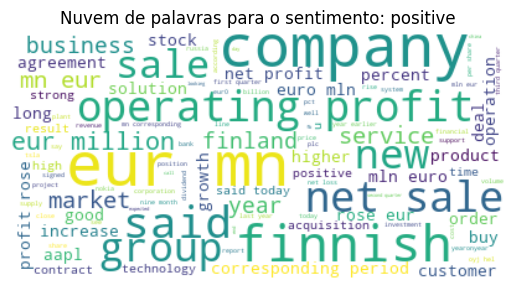

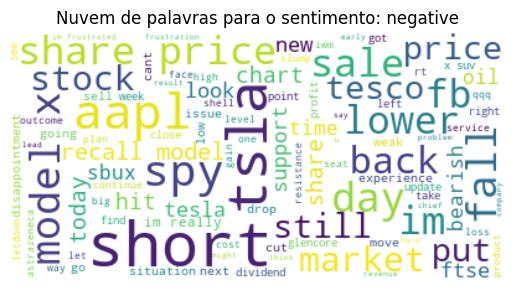

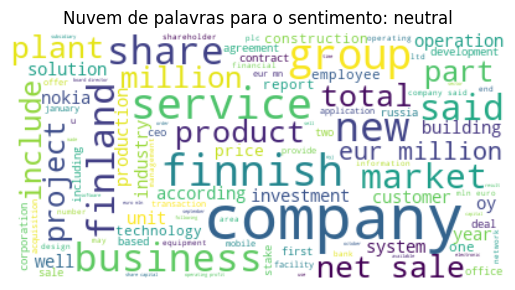

In [245]:
sentimentos = df_sentimentos_unicos['Sentiment'].unique()
for sentimento in sentimentos:
	nuvem_palavras(sentimento)

6. Preparando o dataset para treinar o modelo

In [246]:
df_sentimentos_unicos = df_sentimentos_unicos.drop(['sentence_length', 'cleaned_sentence_length'], axis=1)
df_sentimentos_unicos.sample(3)

,Sentence,Sentiment,cleaned_sentence,Sentence_sents,qtd_sentencas
5359,"Indigo and Somoncom serve 377,000 subscribers ...",neutral,"[indigo, somoncom, serve, 377000, subscriber, ...","[Indigo and Somoncom serve 377,000 subscribers...",1
2364,"Product deliveries will not be interrupted , t...",neutral,"[product, delivery, interrupted, refiner, said...","[Product deliveries will not be interrupted , ...",1
4234,HSBC appoints business leaders to board,positive,"[hsbc, appoints, business, leader, board]",[HSBC appoints business leaders to board],1


In [247]:
df_sentimentos_unicos['cleaned_sentence_str'] = df_sentimentos_unicos['cleaned_sentence'].apply(' '.join)
df_sentimentos_unicos.sample(3)

,Sentence,Sentiment,cleaned_sentence,Sentence_sents,qtd_sentencas,cleaned_sentence_str
4873,Secure your files online Like filling out a ta...,neutral,"[secure, file, online, like, filling, tax, ret...",[Secure your files online Like filling out a t...,1,secure file online like filling tax return mak...
3608,The huge bridge girders will be delivered to t...,neutral,"[huge, bridge, girder, delivered, site, plant,...",[The huge bridge girders will be delivered to ...,1,huge bridge girder delivered site plant ylivie...
2592,"At the same time , sales development in Russia...",positive,"[time, sale, development, russia, boosted, ope...","[At the same time , sales development in Russi...",1,time sale development russia boosted opening s...


In [248]:
df_sentimentos_unicos['Sentimento_Num'] = df_sentimentos_unicos['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})
df_sentimentos_unicos.sample(3)

,Sentence,Sentiment,cleaned_sentence,Sentence_sents,qtd_sentencas,cleaned_sentence_str,Sentimento_Num
1263,"$AAPL AAPL: Gundlach Slams iPad mini, Sees Dow...",negative,"[aapl, aapl, gundlach, slam, ipad, mini, see, ...","[$AAPL AAPL: Gundlach Slams iPad mini, Sees Do...",2,aapl aapl gundlach slam ipad mini see downside...,0
1382,$TWTR The best scenario going forward is this ...,negative,"[twtr, best, scenario, going, forward, stock, ...",[$TWTR The best scenario going forward is this...,1,twtr best scenario going forward stock slowly ...,0
529,New Novator products are supposed to be export...,neutral,"[new, novator, product, supposed, exported]",[New Novator products are supposed to be expor...,1,new novator product supposed exported,1


In [249]:
df_sentimentos_unicos['Sentimento_Num'].value_counts()

Sentimento_Num
1    2610
2    1852
0     445
Name: count, dtype: int64

7. Balanceamento de Classes

### Classificação

In [292]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from collections import Counter

# Carregue os dados e realize a divisão entre treino e teste
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_sentimentos_unicos['cleaned_sentence_str'])
X_train, X_test, y_train, y_test = train_test_split(X, df_sentimentos_unicos['Sentimento_Num'], test_size=0.3, random_state=20)


#### SVM

In [311]:
# Defina os parâmetros a serem testados
param_grid = {'C': [0.01, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid']}

# Inicialize o classificador SVM
clf = svm.SVC(kernel='linear', gamma='scale')

# Realize a busca em grade com validação cruzada
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Obtenha os melhores parâmetros
best_params = grid_search.best_params_

# Use os melhores parâmetros para treinar o modelo final
clf = svm.SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
clf.fit(X_train, y_train)

# Faça previsões e imprima o relatório de classificação
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.56      0.63       123
           1       0.80      0.87      0.84       767
           2       0.77      0.72      0.75       583

    accuracy                           0.79      1473
   macro avg       0.77      0.72      0.74      1473
weighted avg       0.78      0.79      0.78      1473



In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [306]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 65  24  34]
 [  5 664  98]
 [ 23 169 391]]


In [295]:


# Matriz de confusão
'''conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [str(i) for i in range(len(conf_matrix))]
tick_marks = [i for i in range(len(conf_matrix))]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()'''

"conf_matrix = confusion_matrix(y_test, y_pred)\n\n# Visualizar a matriz de confusão\nplt.figure(figsize=(10, 8))\nplt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)\nplt.title('Confusion Matrix')\nplt.colorbar()\n\nclasses = [str(i) for i in range(len(conf_matrix))]\ntick_marks = [i for i in range(len(conf_matrix))]\nplt.xticks(tick_marks, classes)\nplt.yticks(tick_marks, classes)\n\nplt.xlabel('Predicted')\nplt.ylabel('True')\nplt.show()"

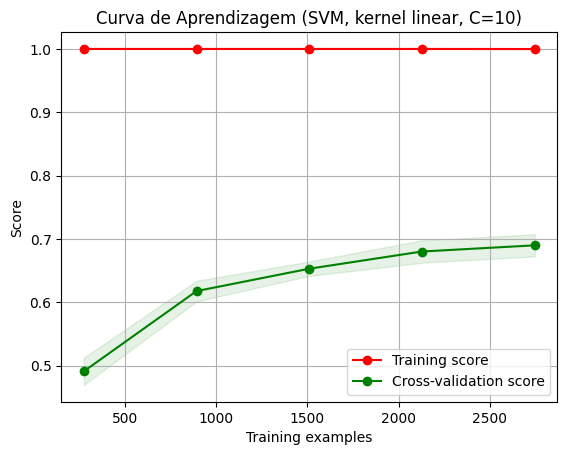

In [282]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar a curva de aprendizagem
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plote a curva de aprendizagem
title = "Curva de Aprendizagem (SVM, kernel linear, C={})".format(best_params['C'])
plot_learning_curve(clf, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


       Feature  Coefficient
9320     short     2.939903
5649        im     2.757048
9627       spy     2.064067
9077      sbux     1.977245
4437        fb     1.900001
2015     awful     1.819055
2572      cant     1.807027
6440   letdown     1.760430
9390   sinking     1.701161
10854    waste     1.677031


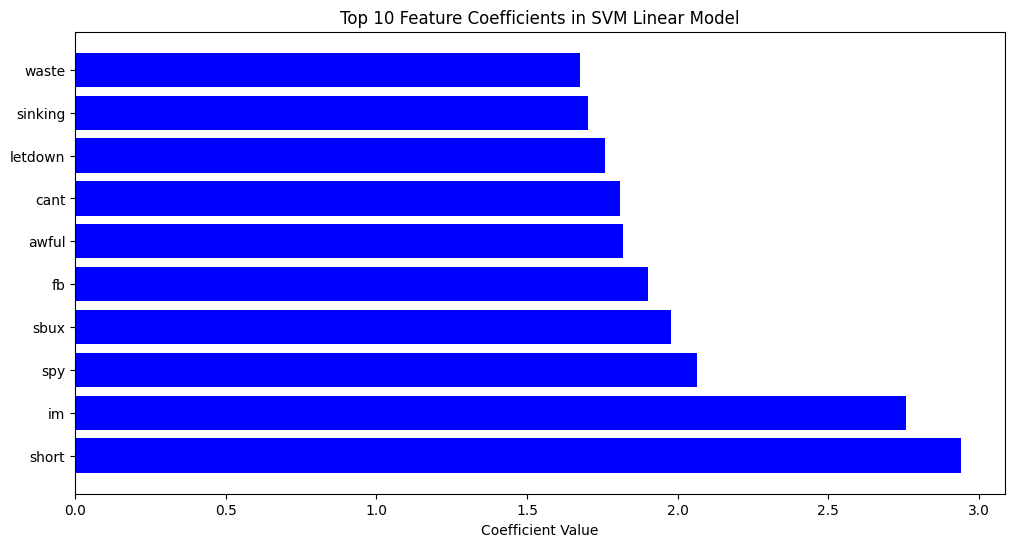

In [283]:
# Obtenha os coeficientes das características
coefficients = clf.coef_.toarray()[0]  # Apenas se você estiver usando um TfidfVectorizer sparse

# Associe os coeficientes às palavras no vetorizador
feature_names = np.array(vectorizer.get_feature_names_out())

# Crie um DataFrame para visualizar os coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordene o DataFrame pelos coeficientes em ordem decrescente de magnitude
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Visualize os 10 principais coeficientes
print(coef_df.head(10))

# Crie um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'][:10], coef_df['Coefficient'][:10], color='blue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients in SVM Linear Model')
plt.show()

In [284]:
nova_frase = clean_text("In the desolate landscape of despair, the air hangs heavy with the acrid scent of hopelessness. Shadows of disappointment cloak every corner, casting a pall over the once vibrant tapestry of optimism. The haunting echoes of shattered dreams reverberate through the corridors of the soul, a constant reminder of aspirations unfulfilled. Loneliness, like a relentless predator, prowls through the heart, leaving behind a trail of desolation. The bitter taste of regret lingers on the tongue, a constant companion in the journey of self-reflection. Failure, with its cold, skeletal fingers, reaches out to touch those who dare to dream, turning vibrant ambitions into mere wisps of what could have been. Doubt, a malevolent force, weaves its insidious web, entangling the threads of confidence and self-belief. The storm clouds of adversity gather on the horizon, threatening to unleash torrents of despair upon the fragile landscape of the human spirit. The silence of rejection is a deafening roar that reverberates through the soul, drowning out any whispers of encouragement. In this dark tableau, the flicker of hope is but a distant and feeble light, struggling to penetrate the overwhelming darkness. The once fertile soil of ambition now lies fallow, the seeds of potential withering in the absence of nurturing positivity. Each step forward seems laden with the weight of past failures, making progress a Sisyphean task. As the sun sets on the horizon, it casts long and foreboding shadows, a visual metaphor for the pervasive gloom that envelops every facet of existence. In this narrative of negativity, the symphony of life plays a dissonant tune, each note a reminder of the harsh realities that threaten to drown out the melody of joy. Yet, in the midst of this bleak landscape, the resilience of the human spirit remains, a flicker of defiance against the encroaching darkness. Perhaps, in acknowledging the depths of despair, one can find the strength to seek out the glimmers of light that persist, however faint they may be, in the pursuit of a brighter tomorrow.")
nova_frase = [' '.join(nova_frase)]

print(nova_frase)

nova_frase_transformada = vectorizer.transform(nova_frase)

previsao = clf.predict(nova_frase_transformada)

classificacao = "negativa" if previsao[0] == 0 else "neutra" if previsao[0] == 1 else "positiva"
print(f'A frase é classificada como: {classificacao}')


['desolate landscape despair air hang heavy acrid scent hopelessness shadow disappointment cloak every corner casting pall vibrant tapestry optimism haunting echo shattered dream reverberate corridor soul constant reminder aspiration unfulfilled loneliness like relentless predator prowl heart leaving behind trail desolation bitter taste regret lingers tongue constant companion journey selfreflection failure cold skeletal finger reach touch dare dream turning vibrant ambition mere wisp could doubt malevolent force weave insidious web entangling thread confidence selfbelief storm cloud adversity gather horizon threatening unleash torrent despair upon fragile landscape human spirit silence rejection deafening roar reverberates soul drowning whisper encouragement dark tableau flicker hope distant feeble light struggling penetrate overwhelming darkness fertile soil ambition lie fallow seed potential withering absence nurturing positivity step forward seems laden weight past failure making p

#### Naive Bayes

In [285]:
from sklearn.naive_bayes import MultinomialNB


# Definir os parâmetros a serem testados
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

# Inicializar o classificador Naive Bayes
nb_clf = MultinomialNB()

# Realizar a busca em grade
grid_search = GridSearchCV(nb_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros
best_params = grid_search.best_params_

# Usar os melhores parâmetros para treinar o modelo final
clf = MultinomialNB(alpha=best_params['alpha'])
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)

# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.63      0.63       144
           1       0.80      0.84      0.82       782
           2       0.70      0.64      0.67       547

    accuracy                           0.75      1473
   macro avg       0.71      0.71      0.71      1473
weighted avg       0.74      0.75      0.74      1473



In [287]:
# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 91,  13,  40],
       [ 16, 657, 109],
       [ 39, 156, 352]], dtype=int64)

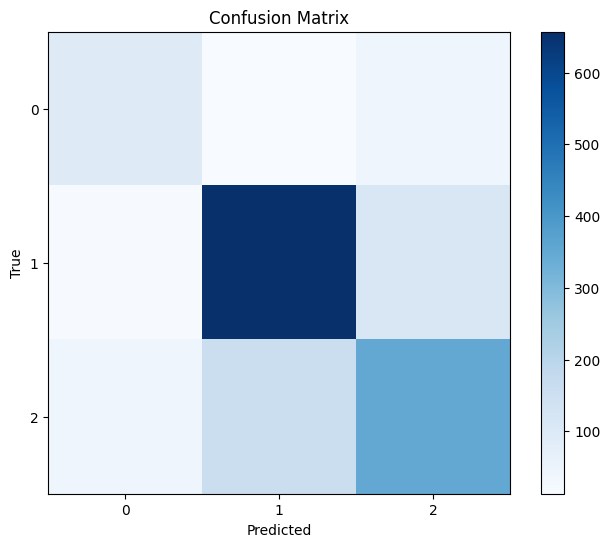

In [288]:


# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [str(i) for i in range(len(conf_matrix))]
tick_marks = [i for i in range(len(conf_matrix))]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

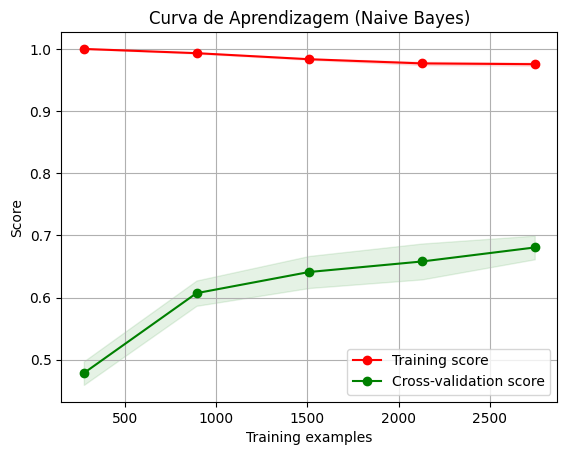

In [289]:
# Plote a curva de aprendizagem
title = "Curva de Aprendizagem (Naive Bayes)"
plot_learning_curve(clf, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


                     0          1          2
im           -5.015350 -11.147042  -8.837372
tsla         -5.612491 -11.147042  -7.247252
short        -5.731862  -9.938980  -7.346959
aapl         -5.956635  -9.487597  -6.276933
recall       -6.037134 -11.147042  -9.673452
spy          -6.041204 -11.147042  -7.418088
price        -6.060798  -6.514351  -6.642854
cant         -6.119316  -9.782804 -10.877873
disappointed -6.184312 -11.147042 -10.877873
model        -6.188823  -8.265127  -8.595645


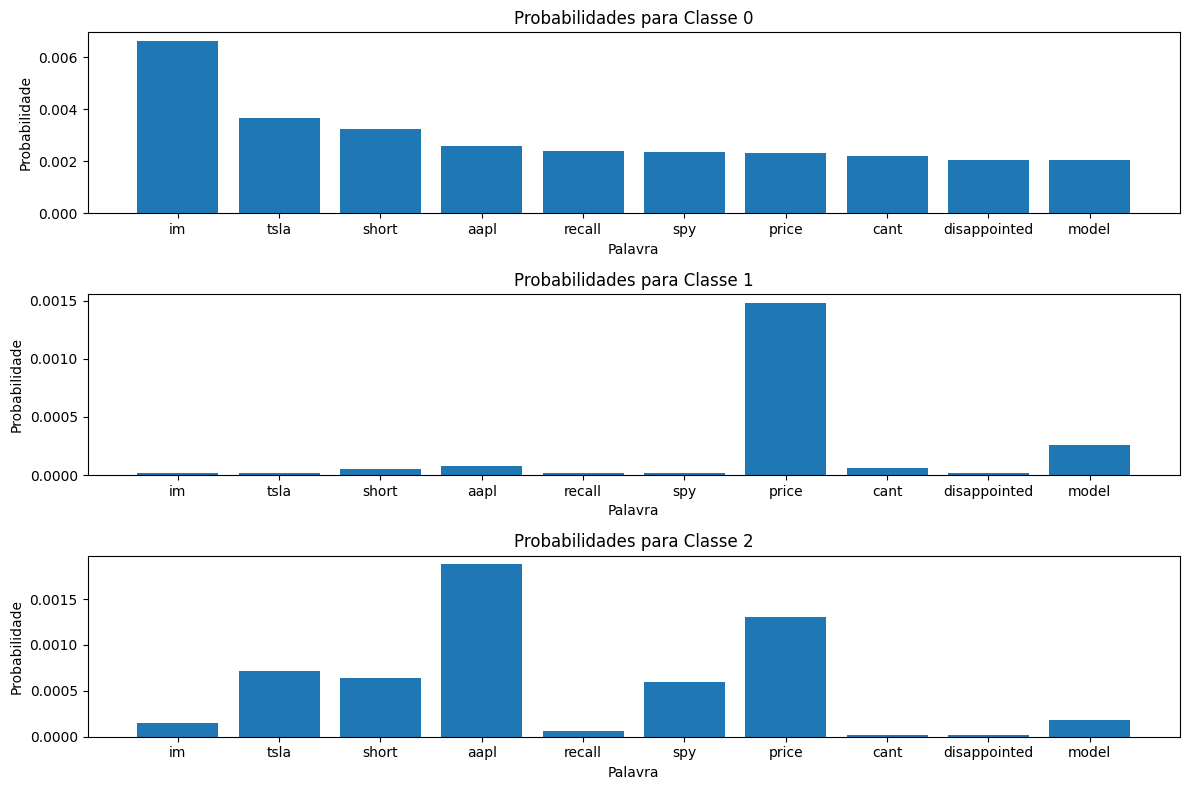

In [291]:
# Treine o modelo Naive Bayes Multinomial
clf = MultinomialNB(alpha=best_params['alpha'])
clf.fit(X_train, y_train)

# Obtenha os log probabilities das características para cada classe
log_probs = clf.feature_log_prob_

# Associe os log probabilities às palavras no vetorizador
feature_names = np.array(vectorizer.get_feature_names_out())

# Crie um DataFrame para visualizar as probabilidades
import pandas as pd
prob_df = pd.DataFrame(log_probs, columns=feature_names)

# Ordene o DataFrame pelas probabilidades em ordem decrescente
prob_df = prob_df.T.sort_values(by=[0, 1, 2], ascending=False)

# Visualize as 10 principais palavras e suas probabilidades para cada classe
print(prob_df.head(10))

# Plote as probabilidades das palavras mais importantes
plt.figure(figsize=(12, 8))
for i in range(3):  # assume 3 classes
    plt.subplot(3, 1, i + 1)
    plt.bar(prob_df.index[:10], np.exp(prob_df[i][:10])) 
    plt.title(f'Probabilidades para Classe {i}')
    plt.ylabel('Probabilidade')
    plt.xlabel('Palavra')

plt.tight_layout()
plt.show()


#### Rede Neural

In [294]:
from sklearn.neural_network import MLPClassifier

# Definir os parâmetros a serem testados
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

# Inicializar o classificador Naive Bayes
nb_clf = MLPClassifier()

'''# Realizar a busca em grade
grid_search = GridSearchCV(nb_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
'''
# Obter os melhores parâmetros
best_params = grid_search.best_params_

# Usar os melhores parâmetros para treinar o modelo final
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)

# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62       123
           1       0.79      0.86      0.83       767
           2       0.75      0.69      0.72       583

    accuracy                           0.77      1473
   macro avg       0.74      0.71      0.72      1473
weighted avg       0.77      0.77      0.77      1473



In [296]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 71  19  33]
 [  6 660 101]
 [ 30 152 401]]
